In [1]:
import sys, os
sys.path.append("..")
import torch
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

from mune.memory import ReplayBuffer
from mune.representation import MultimodalBetaVAE, MultimodalBetaVAEConfig

In [2]:
memory = ReplayBuffer.load("../data/memory.pkl")

In [3]:
len(memory)

1873

In [49]:
representation_config = MultimodalBetaVAEConfig(beta=4, latent_dim=32)
representation_module = MultimodalBetaVAE(config=representation_config)

n_step = 300
optimizer = optim.Adam(representation_module.parameters(), lr=0.001)

for step in range(n_step):
    states, actions, rewards, next_states, dones = memory.sample(32)
    with torch.set_grad_enabled(True):
        mu, log_var, z, reco_observations = representation_module(states)
        losses = representation_module.loss(observations=states,
                                            mu=mu,
                                            log_var=log_var,
                                            reco_observations= reco_observations)
        representation_module.zero_grad()
        losses["loss"].backward()
        print("Loss : ", losses["loss"].detach().numpy(), 
              "\tReco loss : ", losses["reco_loss"].detach().numpy(),
              "\tKld loss : ", losses["kld_loss"].detach().numpy())
        optimizer.step()

Loss :  0.2612825 	Reco loss :  0.10672616 	Kld loss :  0.038639084
Loss :  0.55586386 	Reco loss :  0.11326822 	Kld loss :  0.11064891
Loss :  0.12444699 	Reco loss :  0.103108086 	Kld loss :  0.0053347256
Loss :  0.114959866 	Reco loss :  0.083545454 	Kld loss :  0.007853603
Loss :  0.09812793 	Reco loss :  0.070792824 	Kld loss :  0.006833776
Loss :  0.09124214 	Reco loss :  0.07363188 	Kld loss :  0.004402565
Loss :  0.06486331 	Reco loss :  0.056619048 	Kld loss :  0.0020610653
Loss :  0.052189194 	Reco loss :  0.044831224 	Kld loss :  0.0018394925
Loss :  0.055933915 	Reco loss :  0.04652184 	Kld loss :  0.002353019
Loss :  0.046706863 	Reco loss :  0.038611155 	Kld loss :  0.002023927
Loss :  0.04803895 	Reco loss :  0.04179807 	Kld loss :  0.0015602196
Loss :  0.039697558 	Reco loss :  0.034929425 	Kld loss :  0.0011920333
Loss :  0.038510144 	Reco loss :  0.035039946 	Kld loss :  0.00086754933
Loss :  0.031104198 	Reco loss :  0.028844366 	Kld loss :  0.00056495797
Loss :  0.0

Loss :  0.014177213 	Reco loss :  0.014176863 	Kld loss :  8.754432e-08
Loss :  0.012639329 	Reco loss :  0.012638833 	Kld loss :  1.238659e-07
Loss :  0.01216539 	Reco loss :  0.012164634 	Kld loss :  1.8905848e-07
Loss :  0.010210575 	Reco loss :  0.010209859 	Kld loss :  1.7881393e-07
Loss :  0.012704683 	Reco loss :  0.012704221 	Kld loss :  1.15484e-07
Loss :  0.012359079 	Reco loss :  0.012358494 	Kld loss :  1.4621764e-07
Loss :  0.012469458 	Reco loss :  0.012468713 	Kld loss :  1.8626451e-07
Loss :  0.011774351 	Reco loss :  0.0117737325 	Kld loss :  1.5459955e-07
Loss :  0.01059953 	Reco loss :  0.010599076 	Kld loss :  1.13621354e-07
Loss :  0.012150092 	Reco loss :  0.012149526 	Kld loss :  1.4156103e-07
Loss :  0.0106166955 	Reco loss :  0.010615712 	Kld loss :  2.4586916e-07
Loss :  0.011272367 	Reco loss :  0.011271544 	Kld loss :  2.0582229e-07
Loss :  0.011381775 	Reco loss :  0.011381473 	Kld loss :  7.543713e-08
Loss :  0.013437212 	Reco loss :  0.01343681 	Kld loss 

Loss :  0.012489099 	Reco loss :  0.012488931 	Kld loss :  4.1909516e-08
Loss :  0.009723185 	Reco loss :  0.009723028 	Kld loss :  3.9115548e-08
Loss :  0.013848588 	Reco loss :  0.013848506 	Kld loss :  2.0489097e-08
Loss :  0.011072188 	Reco loss :  0.01107205 	Kld loss :  3.4458935e-08
Loss :  0.014364962 	Reco loss :  0.0143648535 	Kld loss :  2.7008355e-08
Loss :  0.012290253 	Reco loss :  0.012290186 	Kld loss :  1.6763806e-08
Loss :  0.011753441 	Reco loss :  0.011753284 	Kld loss :  3.9115548e-08
Loss :  0.014080121 	Reco loss :  0.014080028 	Kld loss :  2.3283064e-08
Loss :  0.010038466 	Reco loss :  0.010038351 	Kld loss :  2.8871e-08
Loss :  0.012904697 	Reco loss :  0.012904544 	Kld loss :  3.8184226e-08
Loss :  0.011345842 	Reco loss :  0.011345726 	Kld loss :  2.8871e-08
Loss :  0.014411765 	Reco loss :  0.014411609 	Kld loss :  3.9115548e-08
Loss :  0.013434498 	Reco loss :  0.013434367 	Kld loss :  3.259629e-08
Loss :  0.011359066 	Reco loss :  0.011358917 	Kld loss : 

In [44]:
states, actions, rewards, next_states, dones = memory.sample(1)

with torch.set_grad_enabled(False):
    mu, log_var, z, reco_observations = representation_module(states)

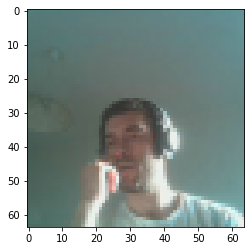

In [45]:
plt.imshow(np.transpose(states["vision"][0].numpy(), (1, 2, 0)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


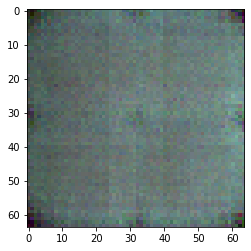

In [46]:
plt.imshow(np.transpose(reco_observations["vision"][0].numpy(), (1, 2, 0)))

In [47]:
F.mse_loss(states["vision"][0], reco_observations["vision"][0])

tensor(0.0185)

In [40]:
reco_observations["vision"][0].max()

tensor(0.6434)